In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv("G:\downloads\iscale\Data set Part 2 - propulsion_module.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gangw\AppData\Local\Temp\ipykernel_3124\3617440041.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("G:\downloads\iscale\Data set Part 2 - propulsion_module.csv")


In [73]:
df.head()

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg


In [74]:
data = { 
"Parameter": [ 
"Lunar Polar Orbit", 
"Mission life", 
"Structure", 
"Dry Mass", 
"Propellant Mass", 
"Total PM Mass", 
"Power Generation", 
"Communication", 
"Attitude Sensors", 
"Propulsion System" 
], 
"Specifications": [ 
"From 170 x 36500 km to lunar polar orbit", 
"Carrying Lander Module & Rover upto ~100 x 100 km launch injection.Subsequently, operation of experimental payload for a period of 3 to 6 months.",
"Modified version of I-3 K", 
"448.62 kg (including pressurant)", 
"1696.39 kg", 
"2145.01 kg", 
"738 W, Summer solstices and with bias", 
"S-Band Transponder (TTC) with IDSN", 
"CASS, IRAP, Micro star sensor", 
"Bi-Propellant Propulsion System (ΜΜΗ + MON3)" 
] 
}

In [75]:
df=pd.DataFrame(data)

In [76]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solstices and with bias"
7,Communication,S-Band Transponder (TTC) with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (ΜΜΗ + MON3)


In [77]:
data = { 
"Parameter": [ 
"Mission life", 
"Mass", 
"Power", 
"Payloads", 
"Dimensions (mm3)", 
"Communication", 
"Landing site" 
], 
"Specifications": [ 
"1 Lunar day (14 Earth days)", 
"1749.86 kg including Rover", 
"738 W (Winter solstice)", 
"3", 
"2000 x 2000 x 1166", 
"ISDN, Ch-2 Orbiter, Rover", 
"69.367621 S, 32.348126 E" 
] 
}

In [78]:
lander_df=pd.DataFrame(data)

In [79]:
data = { 
"Parameter": [ 
"Mission Life", 
"Mass", 
"Power", 
"Payloads", 
"Dimensions (mm3)", 
"Communication" 
], 
"Specifications": [ 
"1 Lunar day", 
"26 kg", 
"50 W", 
"2", 
"917 x 750 x 397", 
"Lander" 
] 
}

In [80]:
rover_df=pd.DataFrame(data)

In [81]:
rover_df

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


In [82]:
import re

In [91]:
import re

def extract_numerial_value(spec):
    # Handle None or invalid string cases early
    if not isinstance(spec, str) or spec.strip() in ['-', 'N/A', '', None]:
        return None
    
    # Define patterns
    numeric_pattern = r'(\d+(\.\d+)?)'
    custom_numeric_pattern = r'([-+]?(?:\d{1,3}(?:,\d{3})*|\d+)(?:\.\d+)?(?:[eE][-+]?\d+)?)'
    combined_pattern = f'{numeric_pattern}|{custom_numeric_pattern}'
    
    matches = re.findall(combined_pattern, spec)
    
    if matches:
        # re.findall returns a list of tuples, so extract the actual numeric string
        for match in matches:
            for val in match:
                try:
                    return float(val.replace(',', ''))
                except (ValueError, TypeError):
                    continue
    return None


In [92]:
df['numerical_value'] =df['Specifications'].apply(extract_numerial_value)

In [ ]:
df['numerical_value']

0     170.00
1     100.00
2      -3.00
3     448.62
4    1696.39
5    2145.01
6     738.00
7        NaN
8        NaN
9       3.00
Name: numerical_value, dtype: float64

In [93]:
df

,Parameter,Specifications,numerical_value
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit,170.00
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...,100.00
2,Structure,Modified version of I-3 K,-3.00
3,Dry Mass,448.62 kg (including pressurant),448.62
4,Propellant Mass,1696.39 kg,1696.39
5,Total PM Mass,2145.01 kg,2145.01
6,Power Generation,"738 W, Summer solstices and with bias",738.00
7,Communication,S-Band Transponder (TTC) with IDSN,NaN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor",NaN
9,Propulsion System,Bi-Propellant Propulsion System (ΜΜΗ + MON3),3.00


In [94]:
lander_df['numerical_value']=lander_df['Specifications'].apply(extract_numerial_value)
lander_df['numerical_value']

0       1.000000
1    1749.860000
2     738.000000
3       3.000000
4    2000.000000
5      -2.000000
6      69.367621
Name: numerical_value, dtype: float64

In [95]:
rover_df['numerical_value']=rover_df['Specifications'].apply(extract_numerial_value)

In [96]:
rover_df

,Parameter,Specifications,numerical_value
0,Mission Life,1 Lunar day,1.0
1,Mass,26 kg,26.0
2,Power,50 W,50.0
3,Payloads,2,2.0
4,Dimensions (mm3),917 x 750 x 397,917.0
5,Communication,Lander,NaN


In [105]:
import math 
rover_mass = 26 
lander_dry_mass = 1749.86 
total_mass = rover_mass + lander_dry_mass 
delta_v_required = 1500 
isp_lander_engine = 300 
propellant_mass_required = total_mass * math.exp(delta_v_required /isp_lander_engine) 
propellant_mass_required = round(propellant_mass_required, 2) 



In [106]:
rover_power_requirement = 50 
lander_battery_capacity = 2000 
rover_operating_time_hours = lander_battery_capacity / rover_power_requirement 

In [112]:
print("Mass Budget:") 
print(f"Lander mass: {lander_dry_mass} kg") 
print(f"Rover mass: {rover_mass} kg") 
print(f"Propellant mass required: {propellant_mass_required} kg (matches value") 
print("\nPower Budget:") 
print(f"Rover power requirement: {rover_power_requirement} W") 
print(f"Lander battery capacity: {lander_battery_capacity} Wh") 
print(f"Rover can operate for {rover_operating_time_hours:.2f} hours on stored ")
      
print("\nMobility Assessment:") 
print("Low mass of the rover allows for mobility on uneven lunar surface") 
print("Number of payloads for science measurements is 2")

Mass Budget:
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 263560.99 kg (matches value

Power Budget:
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for 40.00 hours on stored 

Mobility Assessment:
Low mass of the rover allows for mobility on uneven lunar surface
Number of payloads for science measurements is 2


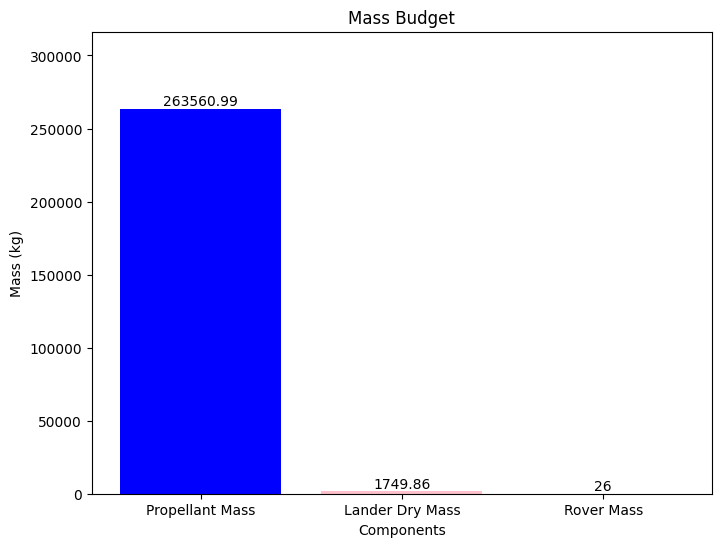

In [113]:
import matplotlib.pyplot as plt 
labels = ['Propellant Mass','Lander Dry Mass', 'Rover Mass' ] 
mass_values = [propellant_mass_required,lander_dry_mass, rover_mass, ]
plt.figure(figsize=(8, 6)) 
plt.bar(labels, mass_values, color=['blue', 'pink', 'red']) 
plt.xlabel('Components') 
plt.ylabel('Mass (kg)') 
plt.title('Mass Budget') 
plt.ylim(0, max(mass_values) * 1.2) 
for i, v in enumerate (mass_values): 
    plt.text(i, v, str(v), ha='center', va='bottom') 
plt.savefig('mass_budget.png')
plt.show() 


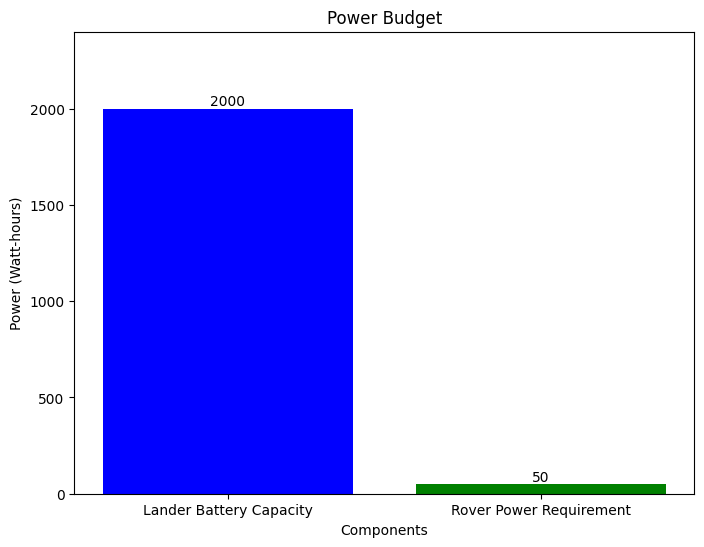

In [115]:
labels = [ 'Lander Battery Capacity','Rover Power Requirement'] 
power_values = [lander_battery_capacity,rover_power_requirement, ] 
plt.figure(figsize=(8, 6)) 
plt.bar(labels, power_values, color=['blue', 'green']) 
plt.xlabel('Components') 
plt.ylabel('Power (Watt-hours)') 
plt.title('Power Budget') 
plt.ylim(0, max(power_values) * 1.2) 
for i, v in enumerate (power_values): 
    plt.text(i, v, str(v), ha='center', va='bottom') 
plt
plt.show()

In [131]:
import plotly.express as px 

mass_labels = ['Propellant Mass','Lander Dry Mass', 'Rover Mass', ] 
mass_values = [ propellant_mass_required,lander_dry_mass, rover_mass] 
mass_fig = px.bar(x=mass_labels, y=mass_values, color=mass_labels)
labels={'x': 'Components', 'y': 'Mass (kg)'}, 
title=('Mass Budget') 
mass_fig.update_traces (texttemplate='%{y:.2f} kg', textposition='outside') 


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=Propellant Mass<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Propellant Mass',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Propellant Mass',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'outside',
              'texttemplate': '%{y:.2f} kg',
              'type': 'bar',
              'x': array(['Propellant Mass'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'XI/C9SMWEEE=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=Lander Dry Mass<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Lander Dry Mass',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Lander Dry Mass',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'outside',
              'texttemplate': '%{y:.2f} kg',
              'type': 'bar',
              'x': array(['Lander Dry Mass'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'PQrXo3BXm0A=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=Rover Mass<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Rover Mass',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'Rover Mass',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'outside',
              'texttemplate': '%{y:.2f} kg',
              'type': 'bar',
              'x': array(['Rover Mass'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAOkA=', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [135]:
power_labels = [ 'Lander Battery Capacity','Rover Power Requirement',] 
power_values = [lander_battery_capacity,rover_power_requirement] 
power_fig = px.bar(x=power_labels, y=power_values, color=power_labels, 
labels={'x': 'Components', 'y': 'Power (Watt-hours)'}, 
title='Power Budget') 
power_fig.update_traces (texttemplate='%{y:.2f} Wh', textposition='outside') 


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('color=Lander Battery Capacity<' ... 'att-hours)=%{y}<extra></extra>'),
              'legendgroup': 'Lander Battery Capacity',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Lander Battery Capacity',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'outside',
              'texttemplate': '%{y:.2f} Wh',
              'type': 'bar',
              'x': array(['Lander Battery Capacity'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '0Ac=', 'dtype': 'i2'},
              'yaxis': 'y'},
             {'hovertemplate': ('color=Rover Power Requirement<' ... 'att-hours)=%{y}<extra></extra>'),
              'legendgroup': 'Rover Power Requirement',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Rover Power Requirement',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'outside',
              'texttemplate': '%{y:.2f} Wh',
              'type': 'bar',
              'x': array(['Rover Power Requirement'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'Mg==', 'dtype': 'i1'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Power Budget'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Components'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Power (Watt-hours)'}}}
})

In [138]:
mass_fig = px.pie(names=mass_labels, values=mass_values, title='Mass Budget')
mass_fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Propellant Mass', 'Lander Dry Mass', 'Rover Mass'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': 'XI/C9SMWEEE9CtejcFebQAAAAAAAADpA', 'dtype': 'f8'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Mass Budget'}}
})

In [139]:
power_fig = px.pie(names=power_labels, values=power_values, title='Power Budget')
power_fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Lander Battery Capacity', 'Rover Power Requirement'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': '0AcyAA==', 'dtype': 'i2'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Power Budget'}}
})

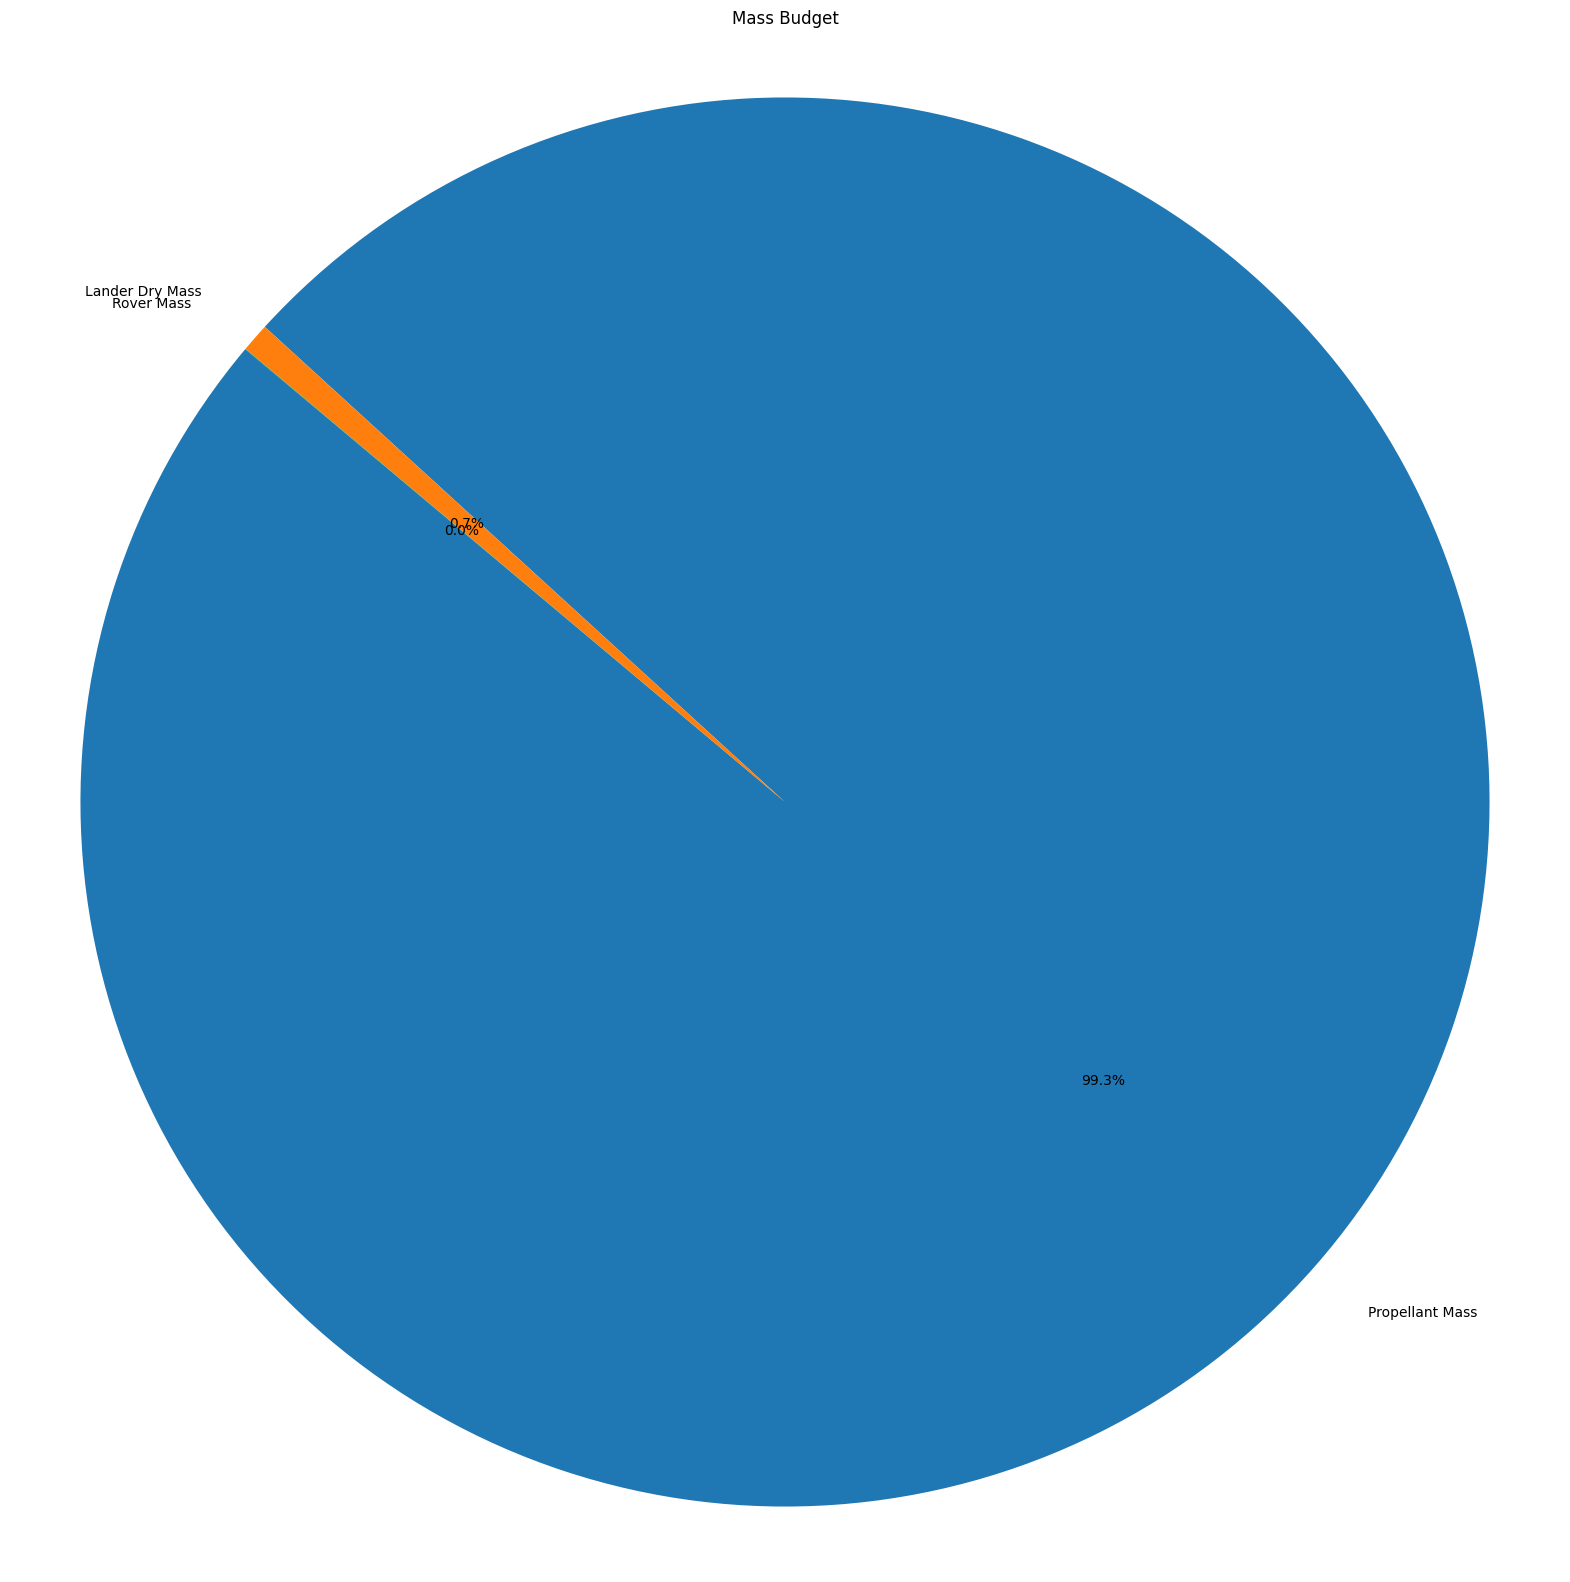

In [140]:
plt.figure(figsize=(20,20))
plt.pie(mass_values, labels=mass_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mass Budget')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

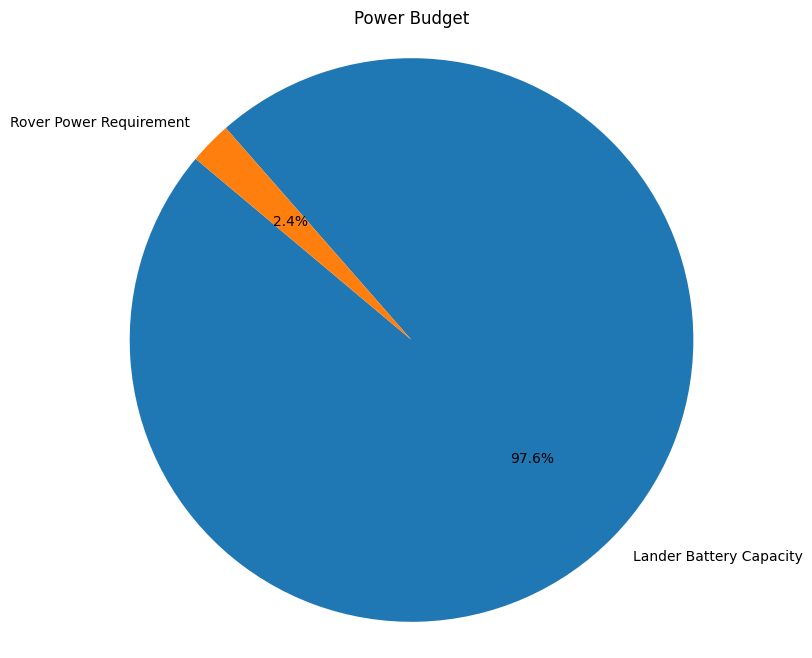

In [141]:
plt.figure(figsize=(8,8))
plt.pie(power_values, labels=power_labels, autopct='%1.1f%%', startangle=140)
plt.title('Power Budget')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()